In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

from pyod.models.auto_encoder import AutoEncoder

import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("./data/healthcare_providers.csv")

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df = df.drop(['index', 'National Provider Identifier',
              'Last Name/Organization Name of the Provider',
              'First Name of the Provider', 'Middle Initial of the Provider', 'Street Address 1 of the Provider',
              'Street Address 2 of the Provider', 'Zip Code of the Provider', "HCPCS Code",
              'Credentials of the Provider', 'Medicare Participation Indicator', 'State Code of the Provider',
              'Country Code of the Provider', 'City of the Provider', 'HCPCS Description'], axis=1)


In [ ]:
df.info()

In [ ]:
df['Gender of the Provider'] = df['Gender of the Provider'].apply(lambda x: x if x is not np.nan else 'O')

In [ ]:
df.drop('Entity Type of the Provider', axis=1, inplace=True)

In [ ]:
df["Average Submitted Charge Amount"].dtype

In [ ]:
df["Average Submitted Charge Amount"].dtype

In [ ]:
def del_commas(x):
    return x.replace(",", "")

df["Average Medicare Allowed Amount"] = pd.to_numeric(df["Average Medicare Allowed Amount"].apply(del_commas))
df["Average Submitted Charge Amount"] = pd.to_numeric(df["Average Submitted Charge Amount"].apply(del_commas))
df["Average Medicare Payment Amount"] = pd.to_numeric(df["Average Medicare Payment Amount"].apply(del_commas))
df["Average Medicare Standardized Amount"] = pd.to_numeric(df["Average Medicare Standardized Amount"].apply(del_commas))

In [ ]:
df.info()

In [ ]:
import category_encoders as ce

col = 'Gender of the Provider'
encoder = ce.BinaryEncoder(cols=[col])
dfbin = encoder.fit_transform(df[col])
dfbin

In [ ]:
df.drop('Provider Type', axis=1, inplace=True)

In [ ]:
dum_df = pd.get_dummies(df, columns=['Gender of the Provider', 'HCPCS Drug Indicator', 'Place of Service'])

In [ ]:
dum_df.info()

In [ ]:
dum_df['Number of Services'] = dum_df['Number of Services'].apply(del_commas).apply(float)
dum_df['Number of Medicare Beneficiaries'] = dum_df['Number of Medicare Beneficiaries'].apply(del_commas).apply(float)
dum_df['Number of Distinct Medicare Beneficiary/Per Day Services'] = dum_df['Number of Distinct Medicare Beneficiary/Per Day Services'].apply(del_commas).apply(float)

In [ ]:
dum_df

In [ ]:
columns = dum_df.columns
scaled = StandardScaler().fit_transform(dum_df)
scaled_df = pd.DataFrame(scaled, columns=columns)
scaled_df

In [ ]:
isolation_forest = IsolationForest(n_estimators=300, n_jobs=-1, verbose=1, random_state=0)
Y = isolation_forest.fit_predict(scaled_df)

In [99]:
Y

array([ 1, -1,  1, ...,  1,  1,  1])

In [100]:
Y[Y == 1] = 0
Y[Y == -1] = 1

In [122]:
x_pca

,pc1,pc2
0,0.843220,-0.485128
1,0.003633,0.498566
2,-0.314142,-0.066329
3,-0.839323,-0.152415
4,-0.701600,-0.122127
...,...,...
99995,-0.526737,0.272392
99996,-0.746976,0.335045
99997,-0.091614,-1.025735
99998,-0.862585,0.213521


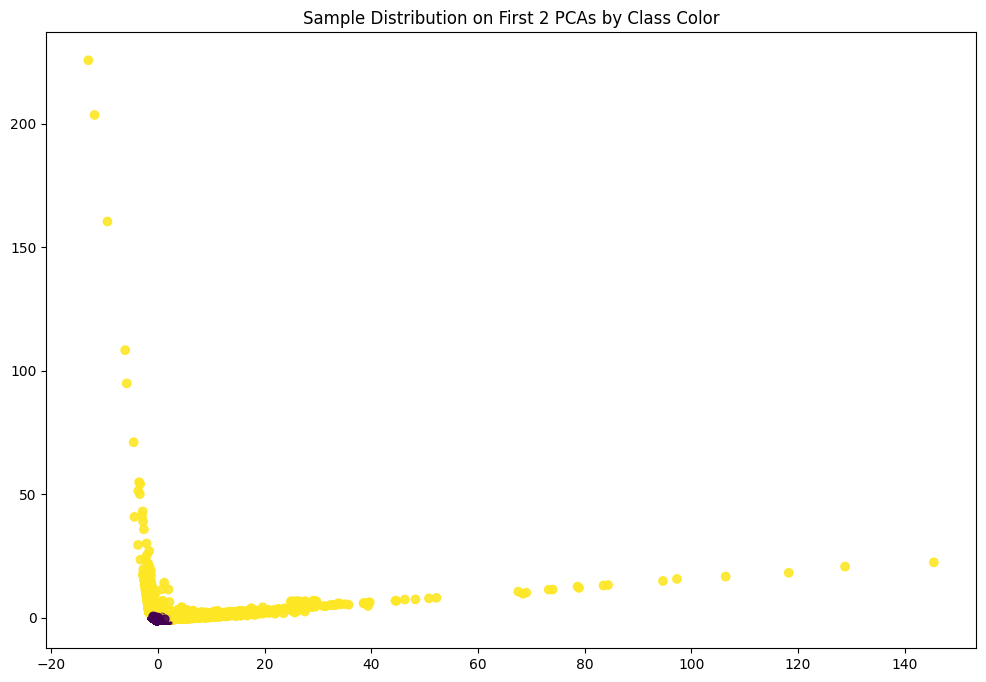

In [121]:
pca = PCA(2)
x_pca = pca.fit_transform(scaled_df)
x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['pc1', 'pc2']

plt.figure(figsize=(12, 8))
plt.title('Sample Distribution on First 2 PCAs by Class Color')
plt.scatter(x_pca['pc1'], x_pca['pc2'], alpha=.9, c=Y)
plt.show()